# Minimierung Fehlklassifikationswahrscheinlichkeit

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sympy import *

In [51]:
mu1 = 1
mu2 = 5
var1 = 5
var2 = 36

# mu1 = 0
# mu2 = 2
# var1 = 0.5
# var2 = 0.25

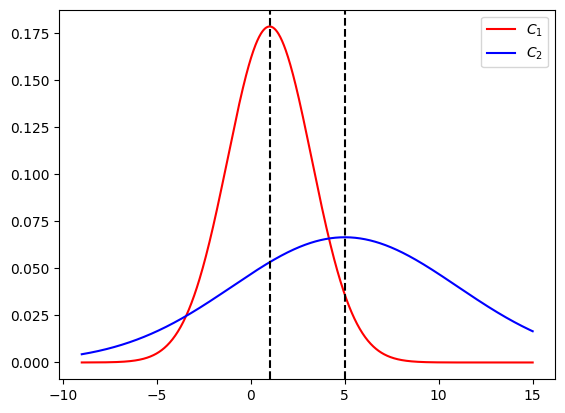

In [52]:
left_border = mu1 - 10
right_border = mu2 + 10
x_plot = np.linspace(left_border, right_border, 1000)

plt.plot(x_plot, norm.pdf(x_plot, mu1, np.sqrt(var1)), color='r', label='$C_1$')
plt.plot(x_plot, norm.pdf(x_plot, mu2, np.sqrt(var2)), color='b', label='$C_2$')

plt.axvline(x=mu1, color='black', linestyle='--')
plt.axvline(x=mu2, color='black', linestyle='--')

plt.legend()
plt.show()

In [53]:
x = Symbol('x')

lhs = (1 / (2 * var2) - 1 / (2 * var1)) * x**2 + ((2 * mu1) / (2 * var1) - (2 * mu2) / (2 * var2)) * x + mu2**2 / (2 * var2) - mu1**2 / (2 * var1) - ln(sqrt(var1 / var2))
eqn = Eq(lhs, 0)

x = solveset(eqn)
print(x)
x = list(x)

{-3.44769783970224, 4.15737525905708}


In [54]:
print(f'R1 = ({x[0]:.4f}, {x[1]:.4f})')
print(f'R2 = (-inf, {x[0]:.4f}) + ({x[1]:.4f}, +inf)')

R1 = (-3.4477, 4.1574)
R2 = (-inf, -3.4477) + (4.1574, +inf)


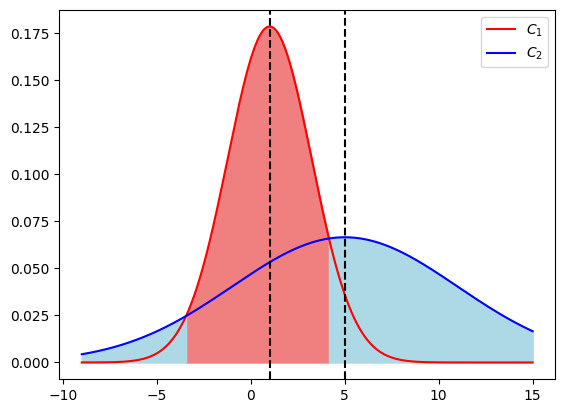

In [55]:
x_plot = np.linspace(left_border, right_border, 1000)

plt.plot(x_plot, norm.pdf(x_plot, mu1, np.sqrt(var1)), color='r', label='$C_1$')
plt.plot(x_plot, norm.pdf(x_plot, mu2, np.sqrt(var2)), color='b', label='$C_2$')

plt.axvline(x=mu1, color='black', linestyle='--')
plt.axvline(x=mu2, color='black', linestyle='--')

R1 = np.linspace(float(x[0]), float(x[1]))
plt.fill_between(R1, norm.pdf(R1, mu1, np.sqrt(var1)), color='lightcoral')

R2_1 = np.linspace(left_border, float(x[0]))
plt.fill_between(R2_1, norm.pdf(R2_1, mu2, np.sqrt(var2)), color='lightblue')

R2_2 = np.linspace(float(x[1]), right_border)
plt.fill_between(R2_2, norm.pdf(R2_2, mu2, np.sqrt(var2)), color='lightblue')

plt.legend()
plt.show()

## Verlustmatrix

In [56]:
L = np.array([[0, 6], [4, 0]])
# L = np.array([[0, 0.5], [1, 0]])

print(L)
print(L[0][1])
print(L[1][0])

[[0 6]
 [4 0]]
6
4


In [57]:
x = Symbol('x')

lhs = (1 / (2 * var2) - 1 / (2 * var1)) * x**2 + ((2 * mu1) / (2 * var1) - (2 * mu2) / (2 * var2)) * x + mu2**2 / (2 * var2) - mu1**2 / (2 * var1) - ln(L[1][0] / L[0][1] * sqrt(var1 / var2))
lhs
eqn = Eq(lhs, 0)

x = solveset(eqn)
print(x)
x = list(x)

{-4.02327861073206, 4.73295603008689}


In [59]:
print(f'R1 = ({x[0]:.4f}, {x[1]:.4f})')
print(f'R2 = (-inf, {x[0]:.4f}) + ({x[1]:.4f}, +inf)')

R1 = (-4.0233, 4.7330)
R2 = (-inf, -4.0233) + (4.7330, +inf)


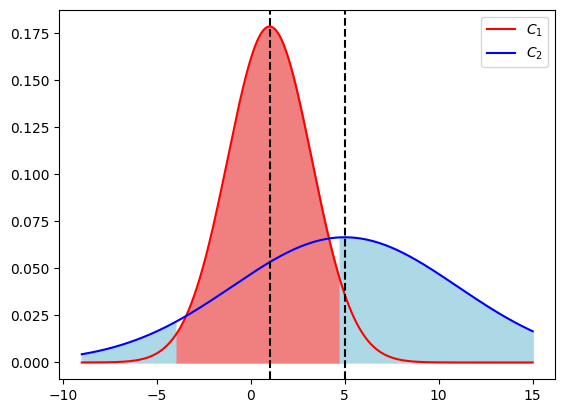

In [60]:
x_plot = np.linspace(left_border, right_border, 1000)

plt.plot(x_plot, norm.pdf(x_plot, mu1, np.sqrt(var1)), color='r', label='$C_1$')
plt.plot(x_plot, norm.pdf(x_plot, mu2, np.sqrt(var2)), color='b', label='$C_2$')

plt.axvline(x=mu1, color='black', linestyle='--')
plt.axvline(x=mu2, color='black', linestyle='--')

R1 = np.linspace(float(x[0]), float(x[1]))
plt.fill_between(R1, norm.pdf(R1, mu1, np.sqrt(var1)), color='lightcoral')

R2_1 = np.linspace(left_border, float(x[0]))
plt.fill_between(R2_1, norm.pdf(R2_1, mu2, np.sqrt(var2)), color='lightblue')

R2_2 = np.linspace(float(x[1]), right_border)
plt.fill_between(R2_2, norm.pdf(R2_2, mu2, np.sqrt(var2)), color='lightblue')

plt.legend()
plt.show()